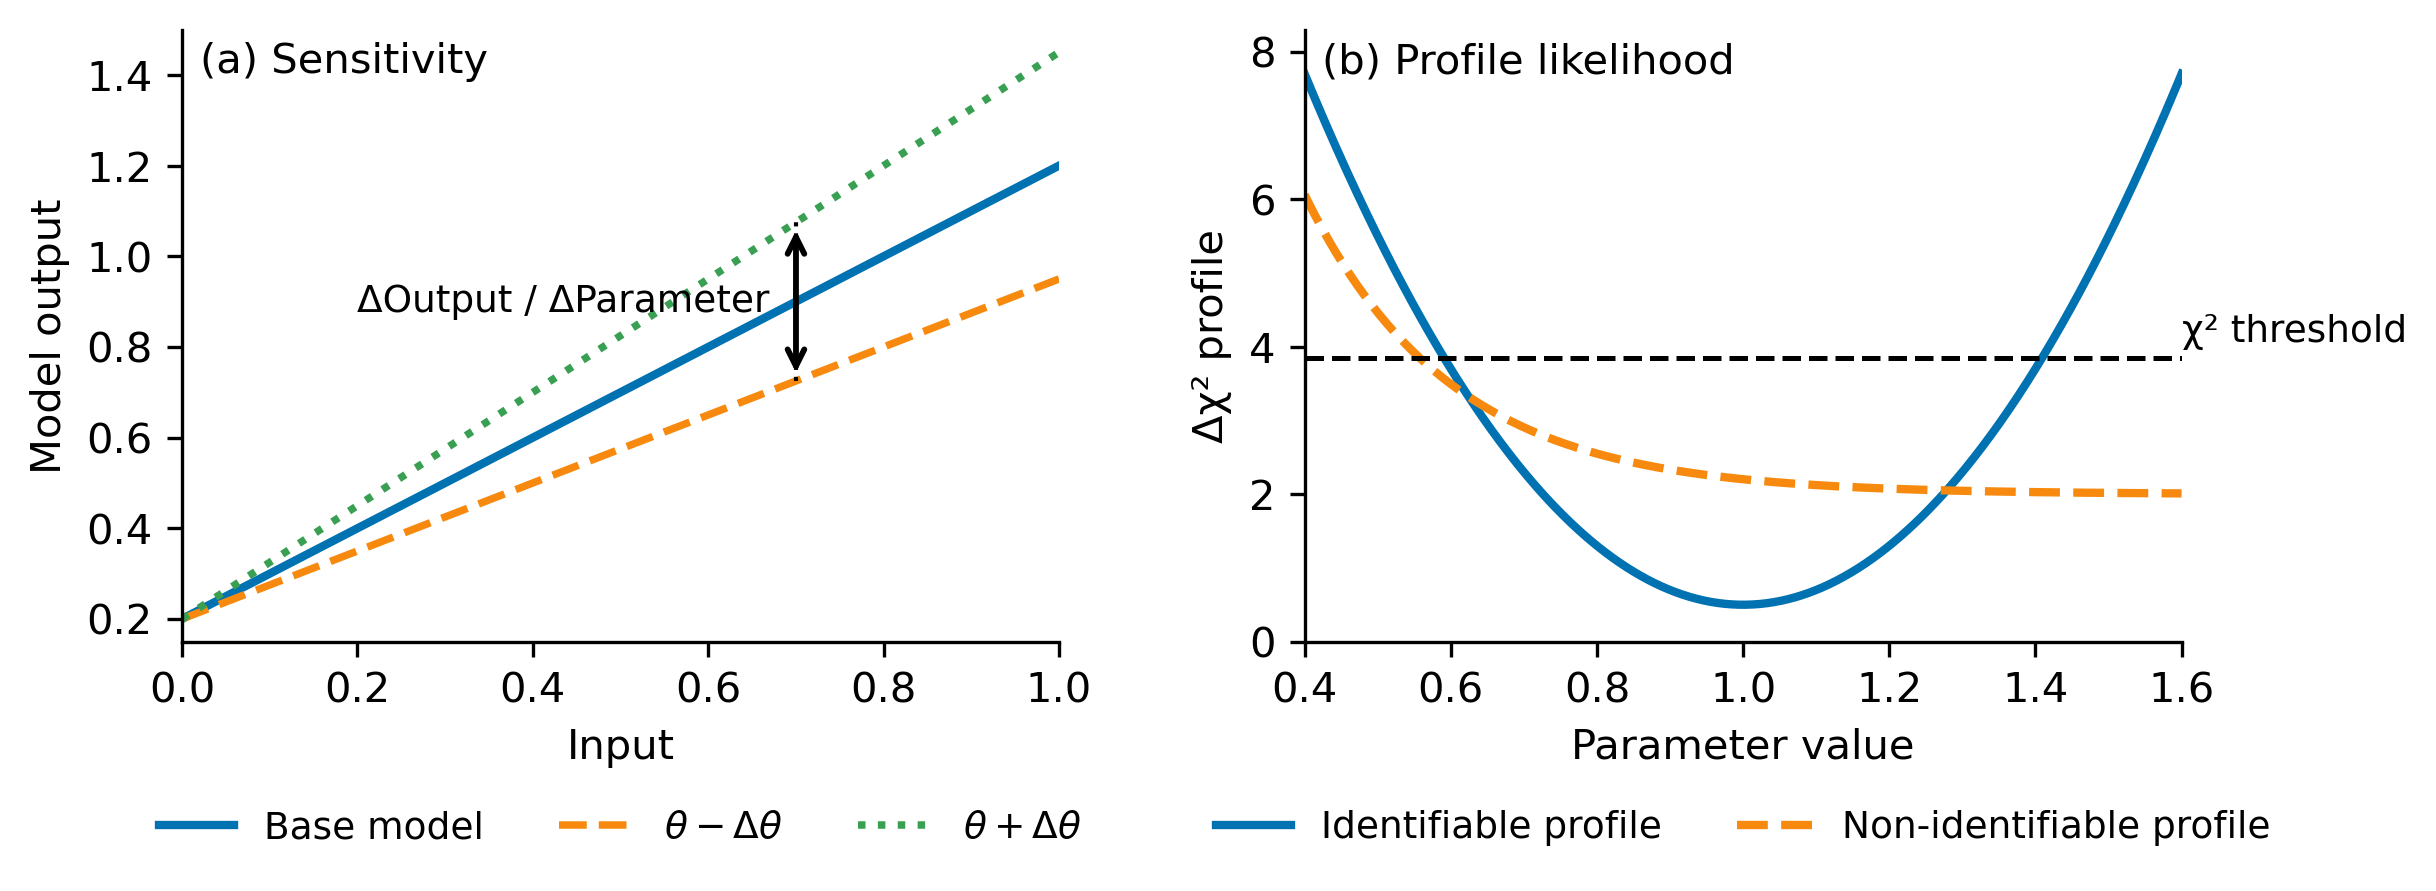

In [33]:
from pathlib import Path
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# -----------------------------
# Style
# -----------------------------
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['axes.titlesize'] = 11
matplotlib.rcParams['axes.labelsize'] = 10
matplotlib.rcParams['legend.fontsize'] = 9
matplotlib.rcParams['figure.dpi'] = 300

# Colour-blind-safe palette (Okabe–Ito)
COL_BASE  = "#0072B2"
COL_MINUS = "#F78A0E"
COL_PLUS  = "#39A053"   
COL_ACC   = "#009E73" 

def make_figure2():
    fig, axes = plt.subplots(1, 2, figsize=(8.6, 3.4))
    ax, axb = axes

    # =========================================
    # Panel (a): Sensitivity schematic (linear)
    # =========================================
    x  = np.linspace(0.0, 1.0, 200)
    b0 = 0.20
    a0 = 1.00
    da = 0.25

    y_base  = a0 * x + b0
    y_minus = (a0 - da) * x + b0
    y_plus  = (a0 + da) * x + b0

    ax.plot(x, y_base,  lw=2.0, color=COL_BASE,  label="Base model")
    ax.plot(x, y_minus, lw=1.8, color=COL_MINUS, linestyle="--", label=r"$\theta-\Delta\theta$")
    ax.plot(x, y_plus,  lw=1.8, color=COL_PLUS,  linestyle=":",  label=r"$\theta+\Delta\theta$")

    # Finite-difference sensitivity at x*
    x0 = 0.70
    y0_minus = (a0 - da) * x0 + b0
    y0_plus  = (a0 + da) * x0 + b0
    ax.vlines(x0, y0_minus, y0_plus, colors="black", linestyles=":", lw=1.0)
    ax.annotate("", xy=(x0, y0_plus), xytext=(x0, y0_minus),
                arrowprops=dict(arrowstyle="<->", lw=1.4, color="black"))
    ax.text(x0 - 0.03, 0.5 * (y0_plus + y0_minus),
            "ΔOutput / ΔParameter", va="center", ha="right", fontsize=9)

    ax.text(0.02, 0.98, "(a) Sensitivity", transform=ax.transAxes,
            ha="left", va="top", fontsize=10)
    ax.set_xlabel("Input")
    ax.set_ylabel("Model output")
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(min(y_minus.min(), y_plus.min()) - 0.05,
                max(y_minus.max(), y_plus.max()) + 0.05)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Legend beneath subplot (a)
    leg_a = ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.22), ncol=3, frameon=False)

    # =========================================
    # Panel (b): Profile likelihood schematic
    # =========================================
    theta = np.linspace(0.4, 1.6, 500)
    theta_star = 1.0
    threshold = 3.84  # χ² threshold (1 dof, 95%)

    # Identifiable: clear minimum below threshold, rises above on both sides
    # Scale the curvature so sides exceed the threshold
    profile_ident = 20.0 * (theta - theta_star)**2 + 0.5  # min = 0.5; edges > 3.84

    # Non-identifiable: starts above threshold, then drops below and stays flat
    # Exponential decay to simulate flat tail
    profile_nonid = 30 * np.exp(-((5*theta))) + 2

    axb.plot(theta, profile_ident, color=COL_BASE,  lw=2.0, label="Identifiable profile")
    axb.plot(theta, profile_nonid, color=COL_MINUS, lw=2.0, linestyle="--", label="Non-identifiable profile")

    # Threshold line
    axb.axhline(threshold, color="black", lw=1.2, linestyle="--")
    axb.text(theta[-1], threshold + 0.12, "χ² threshold", va="bottom", ha="left", fontsize=9)

    axb.text(0.02, 0.98, "(b) Profile likelihood", transform=axb.transAxes,
             ha="left", va="top", fontsize=10)
    axb.set_xlabel("Parameter value")
    axb.set_ylabel("Δχ² profile")
    axb.set_xlim(theta.min(), theta.max())
    ymax = max(threshold + 0.6, profile_ident.max() + 0.6)
    axb.set_ylim(0.0, ymax)
    axb.spines["top"].set_visible(False)
    axb.spines["right"].set_visible(False)

    # Legend beneath subplot (b)
    leg_b = axb.legend(loc="upper center", bbox_to_anchor=(0.5, -0.22), ncol=2, frameon=False)

    # Make space for legends below each axes
    fig.subplots_adjust(bottom=0.28, wspace=0.28)

    # One final render to screen for copy-paste
    plt.show()

make_figure2()
